In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#!conda  install xlrd

In [3]:
Transaction=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name=1,header=1)
New_customer_list=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name=2,header=1)
CustomerDemographic=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name=3,header=1)
CustomerAddress=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name=4,header=1)

In [4]:
Transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
New_customer_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [6]:
New_customer_list.drop(labels=["Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 20"]
                      ,axis=1,inplace=True)

In [7]:
New_customer_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [8]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [9]:
CustomerDemographic.drop(labels=["default"],axis=1,inplace=True)

In [10]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [11]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


We are joining the tables 

In [12]:
new_table=pd.merge(Transaction,CustomerDemographic,on="customer_id")

In [13]:
new_table.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0


In [14]:
final_table=pd.merge(new_table,CustomerAddress,on="customer_id")

In [15]:
final_table.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5


In [16]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  int64         
 1   product_id                           19968 non-null  int64         
 2   customer_id                          19968 non-null  int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  float64       
 5   order_status                         19968 non-null  object        
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

In [17]:
final_table.isna().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                            359
order_status                              0
brand                                   195
product_line                            195
product_class                           195
product_size                            195
list_price                                0
standard_cost                           195
product_first_sold_date                 195
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     446
job_title                              2379
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
owns_car                        

For numerical data we can use mean to fill null values 

In [18]:
final_table["tenure"].mean()

10.68194857084315

For categorical data we can use mode to fill null values

In [19]:
final_table["product_class"].mode()[0]

'medium'

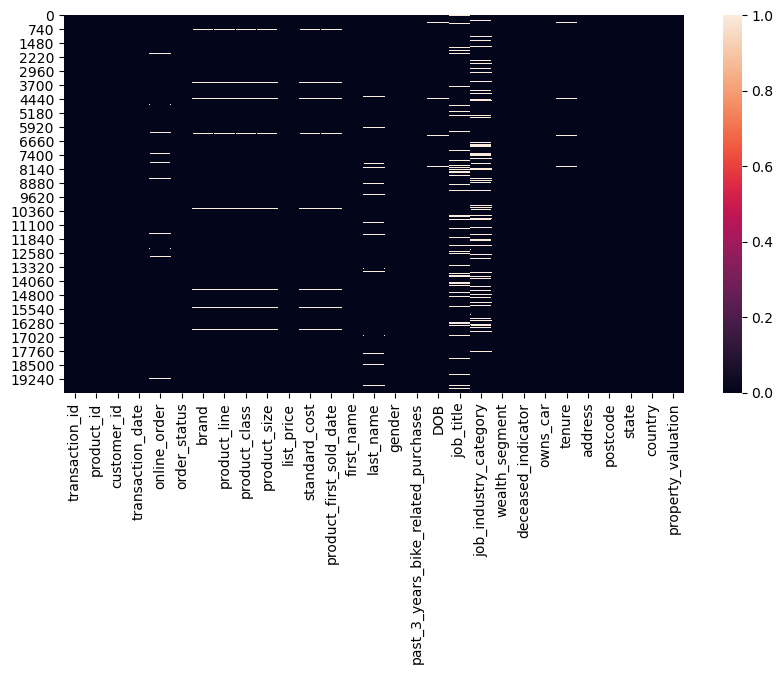

In [20]:
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(final_table.isna())

As we can see there are lots of null values and we have to fill them

In [21]:
def fill_categorical(features):
    for feature in features:
        final_table[feature].fillna(final_table[feature].mode()[0],inplace=True)
        
def fill_numerical(features):
    for feature in features:
        final_table[feature].fillna(final_table[feature].mean(),inplace=True)

def del_col(features):
    for feature in features:
        final_table.drop(labels=[feature],axis=1,inplace=True)

In [22]:
categorical=["online_order","brand","product_line","product_class","product_size","job_title",
             "job_industry_category"]
numerical=["standard_cost","product_first_sold_date","tenure"]

not_imp_column=["transaction_id","product_id","customer_id","first_name","last_name"]

In [23]:
fill_categorical(categorical)

In [24]:
fill_numerical(numerical)

In [25]:
del_col(not_imp_column)

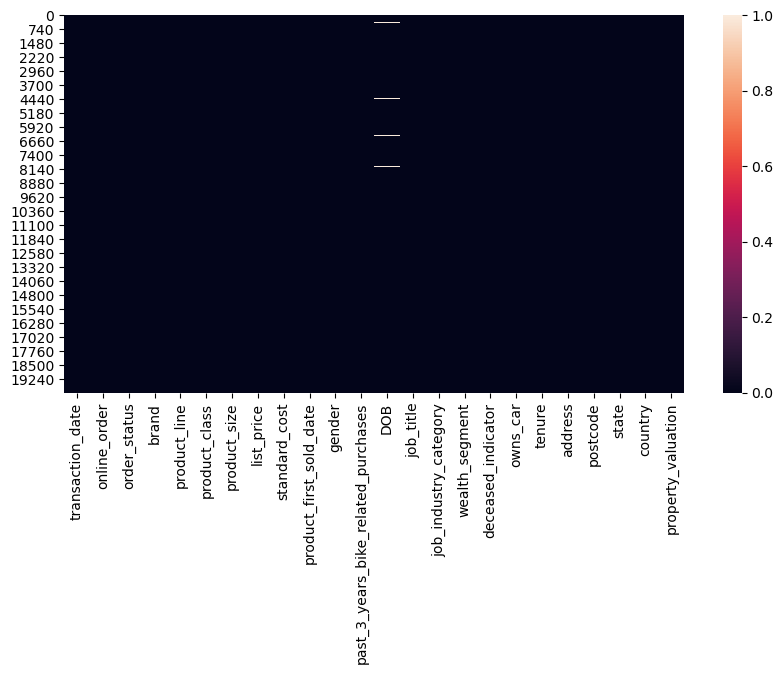

In [26]:
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(final_table.isna())  ## heatmap only show for categorical data

We almost removed null values from our table . We can also remove full column if column contain more than 50% null values but our table columns are not having this situation.

We have to remove null values from DOB columns for that we have to drop that row which contain null values

In [27]:
final_table.dropna(inplace=True)

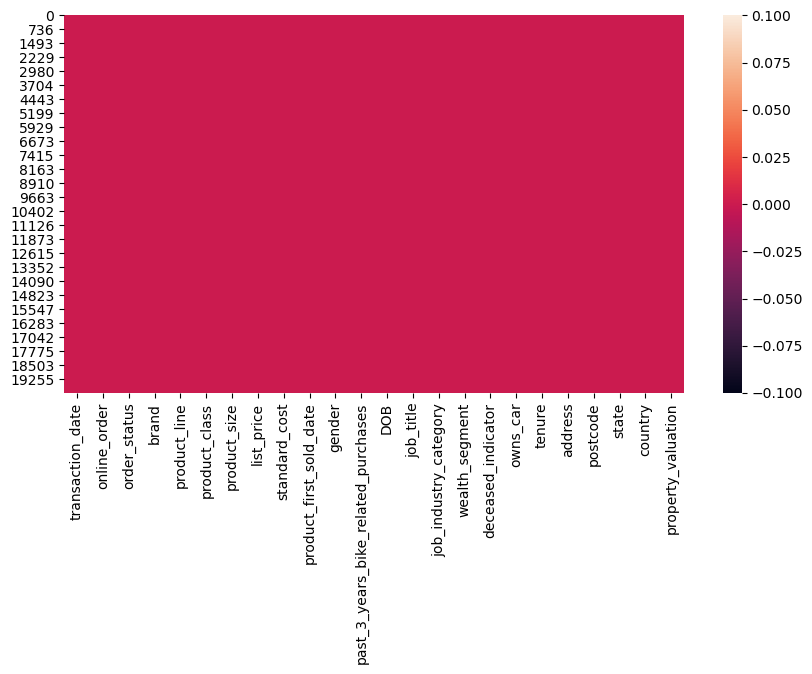

In [28]:
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(final_table.isna())

Making age column from DOB column

In [29]:
now=pd.Timestamp("now")
final_table["DOB"]=pd.to_datetime(final_table["DOB"])
final_table["Age"]=(now-final_table["DOB"]).astype('<m8[Y]')

As we can count age from date of birth so we can remove DOB column from our data set

In [30]:
final_table.drop(labels=["DOB"],axis=1,inplace=True)

We have to remove duplicate data from our table if any exist

In [31]:
final_table.drop_duplicates(inplace=True)

In [32]:
final_table.dtypes

transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                       float64
gender                                         object
past_3_years_bike_related_purchases             int64
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                        float64
address                     

# We have to now see the outliers are present or not

checking outliers in list_price columns

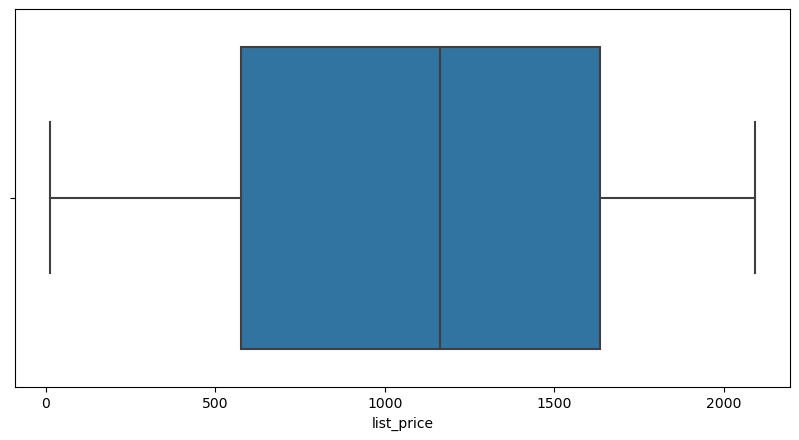

In [33]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(final_table["list_price"])

No outlier

checking outliers in standard_cost columns

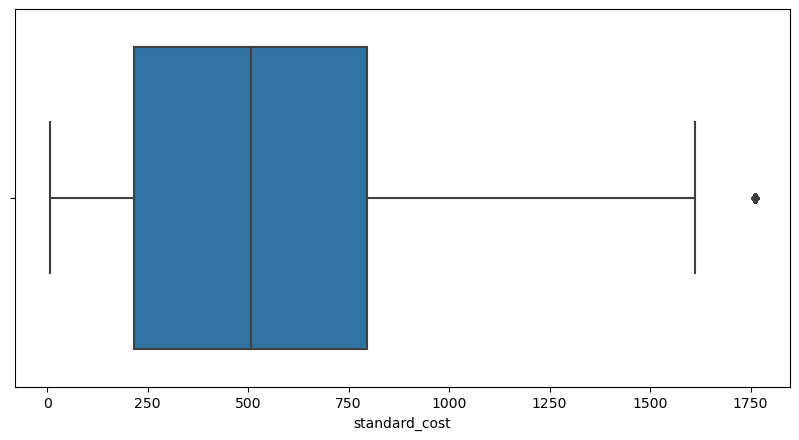

In [34]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(final_table["standard_cost"])

As , we can there are outliers so we have to remove them

In [35]:
index=final_table[(final_table["standard_cost"]<0)|(final_table["standard_cost"]>1600)].index

In [36]:
index

Int64Index([   34,    84,   115,   189,   226,   250,   339,   340,   459,
              711,
            ...
            19217, 19236, 19452, 19523, 19665, 19671, 19679, 19703, 19821,
            19920],
           dtype='int64', length=386)

In [37]:
final_table.drop(index,inplace=True)

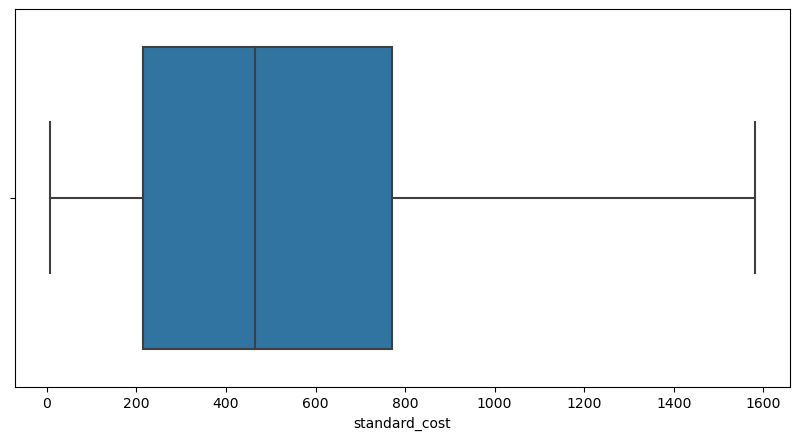

In [38]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(final_table["standard_cost"])

As , we can see now that outliers are removed

checking outliers in product_first_sold_date columns

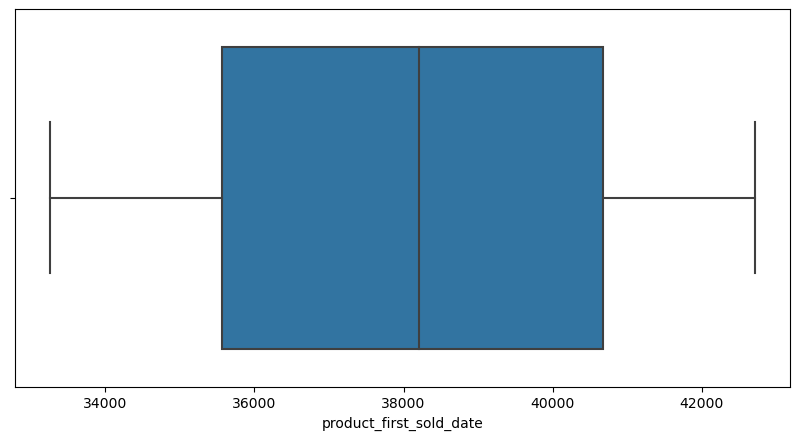

In [39]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(final_table["product_first_sold_date"])

No outlier

checking outliers in past_3_years_bike_related_purchases columns

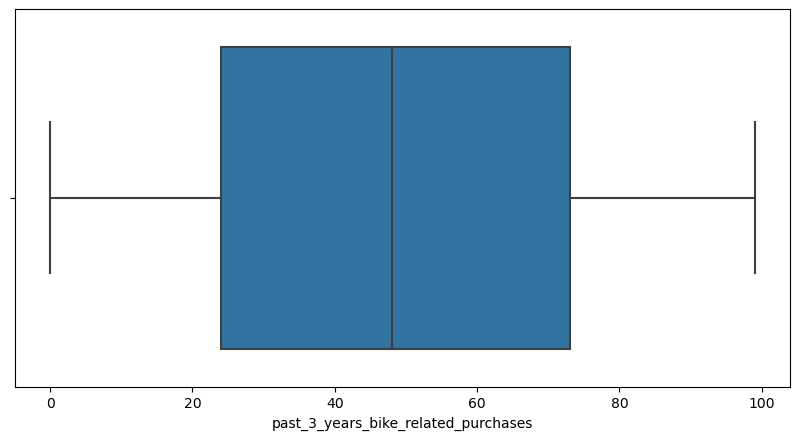

In [40]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(final_table["past_3_years_bike_related_purchases"])

No outlier

checking outliers in tenure columns

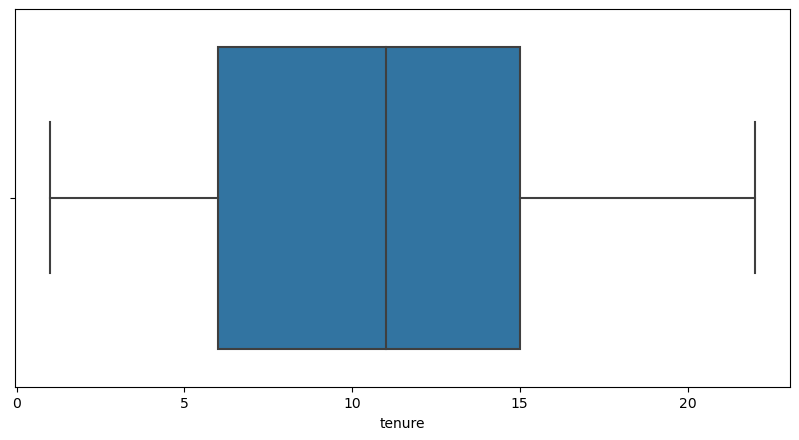

In [41]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(final_table["tenure"])

checking outliers in Age columns

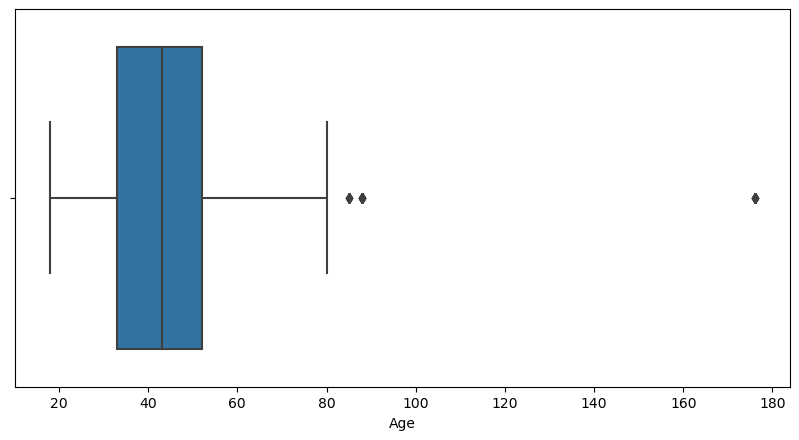

In [42]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(final_table["Age"])

As , we can see that there are outlier so we have to remove that 

In [43]:
index=final_table[(final_table["Age"]<10)|(final_table["Age"]>80)].index

In [44]:
index

Int64Index([ 2459,  2460,  2461,  2462,  2463,  2464,  2465,  2466,  2467,
             5894,  5895,  5896,  5897,  5899,  5900,  5901,  5902, 13004,
            13005, 13006, 13007, 13008],
           dtype='int64')

In [45]:
final_table.drop(index,inplace=True)

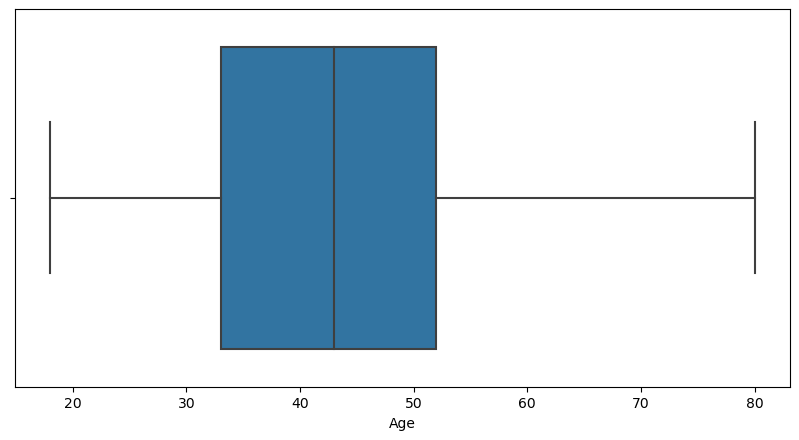

In [46]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(final_table["Age"])

No outlier

As , we can see now that outliers are removed

In [47]:
final_table.shape

(19114, 24)

In [48]:
final_table.to_csv("final_table.csv",index=False)

# Till Now the datsets is accurate and complete